In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(
    # "../data/SG-ES.csv", 
    "../../../Downloads/SG-RS.csv", 
    parse_dates=["dataNotificacao", "dataEncerramento"], 
    encoding="utf-8", 
    sep=";"
)

df

/tmp/ipykernel_4933/2876736487.py:1: DtypeWarning: Columns (12,31,33,34,37,57,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Dor de Cabeça, Tosse, Febre, Dor de Garganta, ...",Não,Branca,congestao,NaN,Não,NaN,NaN,Feminino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-12-14,NaN,NaN,NaN,47.0
1,"Coriza, Tosse, Febre, Dor de Garganta",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-06-08,NaN,NaN,NaN,47.0
2,"Coriza, Febre",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-08-29,NaN,NaN,NaN,5.0
3,"Coriza, Dor de Garganta",Não,Branca,NaN,NaN,Não,NaN,NaN,Masculino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-09-28,NaN,NaN,NaN,22.0
4,"Tosse, Febre",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-07-21,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325853,"Tosse, Febre",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-07-08,NaN,NaN,NaN,4.0
325854,"Coriza, Dor de Cabeça, Tosse, Febre",Não,Branca,NaN,NaN,Não,NaN,NaN,Masculino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-07-07,NaN,NaN,NaN,10.0
325855,"Tosse, Febre, Coriza",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-05-16,NaN,NaN,NaN,NaN
325856,"Dor de Garganta, Tosse",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Rio Grande do Sul,...,NaN,NaN,NaN,NaN,NaN,2022-08-14,NaN,NaN,NaN,NaN


In [4]:

date_range = pd.date_range(
    # start=df['dataInicioSintomas'].min(), Notificação ou início dos sintomas?
    start=df['dataNotificacao'].min(),
    end=df['dataEncerramento'].max(),
    freq='D'
)

sir = pd.DataFrame(
    index=date_range, 
    columns=['I', 'R'], 
    dtype='int'
)

In [5]:
df[df["dataEncerramento"].isnull()].shape[0]

210670

In [6]:
# df = df.dropna(axis=0, subset=['dataEncerramento'])

In [7]:
pd.set_option('future.no_silent_downcasting', True)
sir = sir.fillna(0)

for i, row in df.iterrows():
    
    start = row['dataNotificacao']
    end = start + pd.Timedelta(days=7)
    # end = row['dataEncerramento']
    
    if pd.isna(end):  
        sir.loc[start:, 'I'] += 1
    else: 
        assert start <= end, f"Inconsistency at row {i}, start={start}, end={end}"
        sir.loc[start:end - pd.Timedelta(days=1), 'I'] += 1
        sir.loc[end:, 'R'] += 1


In [8]:
sir

,I,R
2020-01-09,4.0,0.0
2020-01-10,4.0,0.0
2020-01-11,4.0,0.0
2020-01-12,5.0,0.0
2020-01-13,5.0,0.0
...,...,...
2025-09-04,0.0,325855.0
2025-09-05,0.0,325855.0
2025-09-06,0.0,325855.0
2025-09-07,0.0,325855.0


In [9]:
sir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2020-01-09 to 2025-09-08
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       2070 non-null   float64
 1   R       2070 non-null   float64
dtypes: float64(2)
memory usage: 113.1 KB


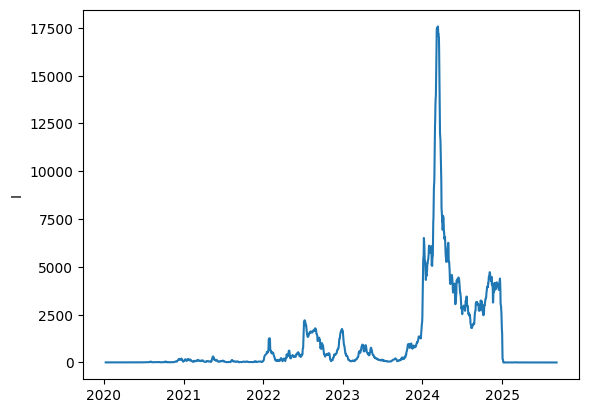

In [10]:
sns.lineplot(data=sir["I"])
plt.show()

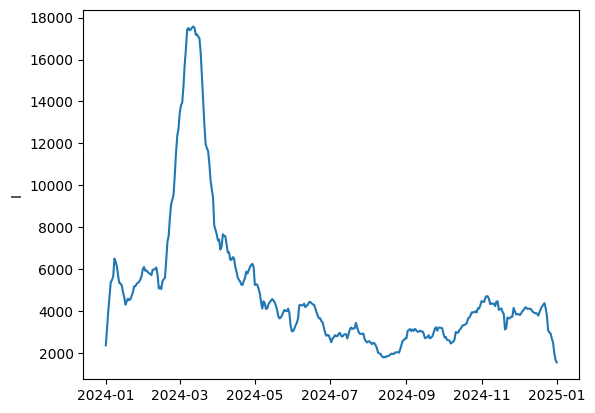

In [11]:
sns.lineplot(data=sir["I"]["2024-01-01":"2025-01-01"])
plt.show()

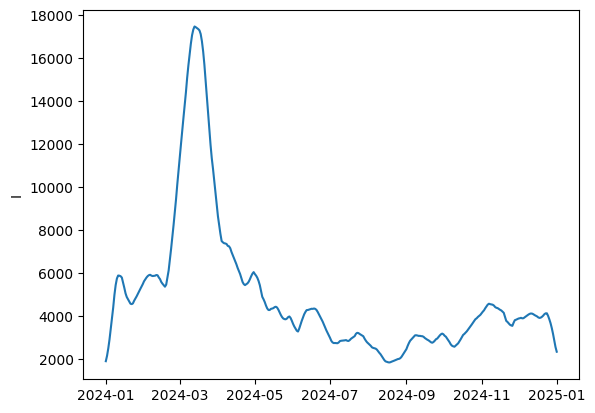

In [12]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2024-01-01":"2025-01-01"])
plt.show()

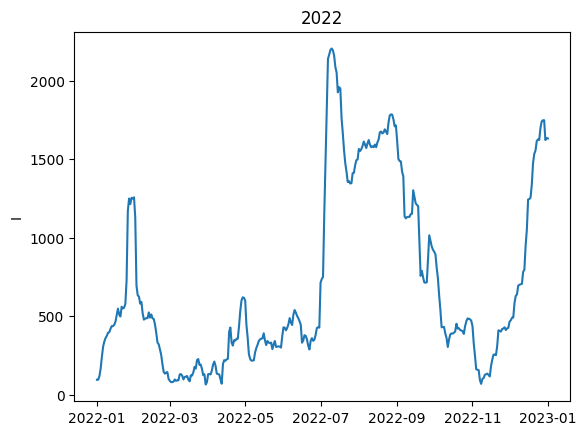

In [13]:
sns.lineplot(data=sir["I"]["2022-01-01":"2023-01-01"])
plt.title("2022")
plt.show()

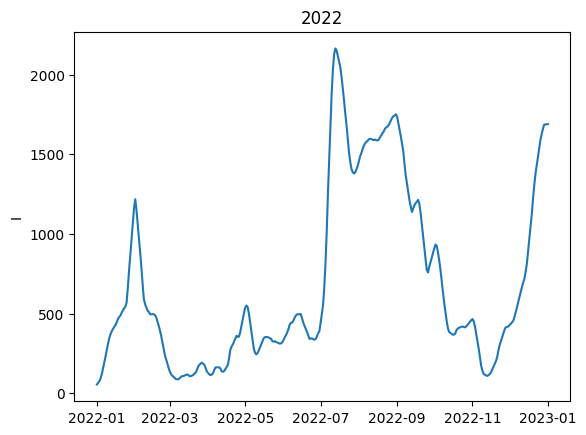

In [14]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2022-01-01":"2023-01-01"])
plt.title("2022")
plt.show()

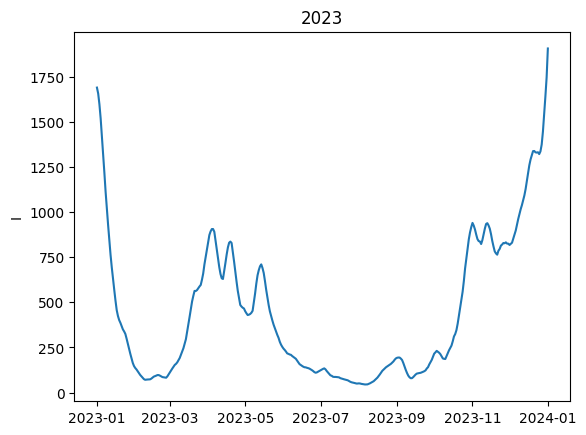

In [15]:
sns.lineplot(data=smoothed_sir["I"]["2023-01-01":"2024-01-01"])
plt.title("2023")
plt.show()